In [116]:
import pandas as pd

# Load the data to see the first few rows and summary information
data_path = 'Data/data_all.csv'
data = pd.read_csv(data_path)

org_data = data.copy()

# Color definition
color_main = '#6ebb83'
color_second = '#18252b'
color_CS = '#ffcd8c'
color_UC = '#a8d6b5'

# Topics columns identified based on their names
topic_columns = [col for col in data.columns if 'topic_' in col]

# Rename column prop_state_onhprop_state_ to prop_state_onhold
# data.rename(columns={'prop_state_On.hprop_state_': 'prop_state_On.hold'}, inplace=True)

# Display the first few rows and data information
data.head(), data.info(), data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11080 entries, 0 to 11079
Data columns (total 86 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   number                             11080 non-null  object 
 1   account                            11080 non-null  object 
 2   created_by_group                   11080 non-null  object 
 3   business_service                   11080 non-null  object 
 4   assignment_group                   11080 non-null  object 
 5   impact                             11080 non-null  object 
 6   priority                           11080 non-null  object 
 7   urgency                            11080 non-null  object 
 8   sla_has_breached                   11080 non-null  bool   
 9   case_cause                         11080 non-null  object 
 10  resolution_code                    11080 non-null  object 
 11  opened                             11080 non-null  obj

(      number                               account created_by_group  \
 0  CS0011381              Saphir Group Networks AG            Unico   
 1  CS0011797                             Siloah AG            Unico   
 2  CS0011896                         Interhydro AG            Unico   
 3  CS0012000  Verband Regionaler SD Münchenbuchsee             User   
 4  CS0012311                     Schilthornbahn AG            Unico   
 
                                  business_service        assignment_group  \
 0                               Managed Workplace  Service Desk 1st Level   
 1                                  Hosted Desktop  Service Desk 1st Level   
 2  No Business Service - only best effort service           IT Operations   
 3  No Business Service - only best effort service  Service Desk 2nd Level   
 4  No Business Service - only best effort service           IT Operations   
 
     impact      priority     urgency  sla_has_breached  \
 0  3 - Low       4 - Low  2 - Medium

In [117]:
# Check for missing values in the dataset
missing_data = data.isnull().sum()

# Display the columns with missing data and their count of missing values
missing_data[missing_data > 0]


description    1192
cause          1946
close_notes       3
dtype: int64

In [118]:
# Confirm no more missing values
data.isnull().sum().sum()

# Generate descriptive statistics for the cleaned data
descriptive_stats = data.describe()

# Display the descriptive statistics
descriptive_stats


,time_worked,openedToClosed,business_percentage,cluster,topic_network_server,topic_performance_responseIssues,topic_vdi_hostedDesktop,topic_authentication_accounts,topic_officeApplications,topic_printing_drive,...,prop_state_Open,prop_state_Resolved,prop_state_Work.in.Progress,prop_group_Other,prop_group_Service.Desk.1st.Level,prop_group_Service.Desk.2nd.Level,prop_group_Squad.Platform,prop_group_Squad.Server,prop_group_Unico.Workplace,prop_group_Vorortsupport.Siloah
count,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,...,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000,11080.000000
mean,2383.819224,280.565955,27.022679,3.264531,0.156052,0.150904,0.187272,0.140190,0.145933,0.133573,...,8.302644,63.430382,7.934166,14.747702,71.430360,1.665161,4.413380,2.735907,2.768542,2.238961
std,2220.195377,231.489951,44.142630,2.557501,0.228676,0.229926,0.259921,0.234573,0.240967,0.224704,...,19.358697,38.622326,19.628135,32.129236,42.974159,11.908168,19.624271,14.993731,15.982228,14.134615
min,360.000000,12.058889,0.030000,0.000000,0.000670,0.000177,0.000177,0.000177,0.000177,0.000177,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,900.000000,175.961181,0.110000,1.000000,0.009351,0.008770,0.010780,0.008755,0.008755,0.008758,...,0.010000,24.455000,0.000000,0.000000,15.097500,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1440.000000,183.426806,3.320000,3.000000,0.023426,0.017657,0.035157,0.017533,0.017533,0.017533,...,0.250000,82.600000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3060.000000,344.578819,31.040000,5.000000,0.224686,0.213225,0.299885,0.160122,0.170302,0.153028,...,4.420000,98.710000,1.830000,1.010000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7379.000000,804.900972,135.010000,12.000000,0.998939,0.971997,0.971000,0.969970,0.967658,0.973695,...,99.960000,99.960000,99.940000,100.010000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


c:\Users\Student\miniforge-pypy3\envs\Thesis\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


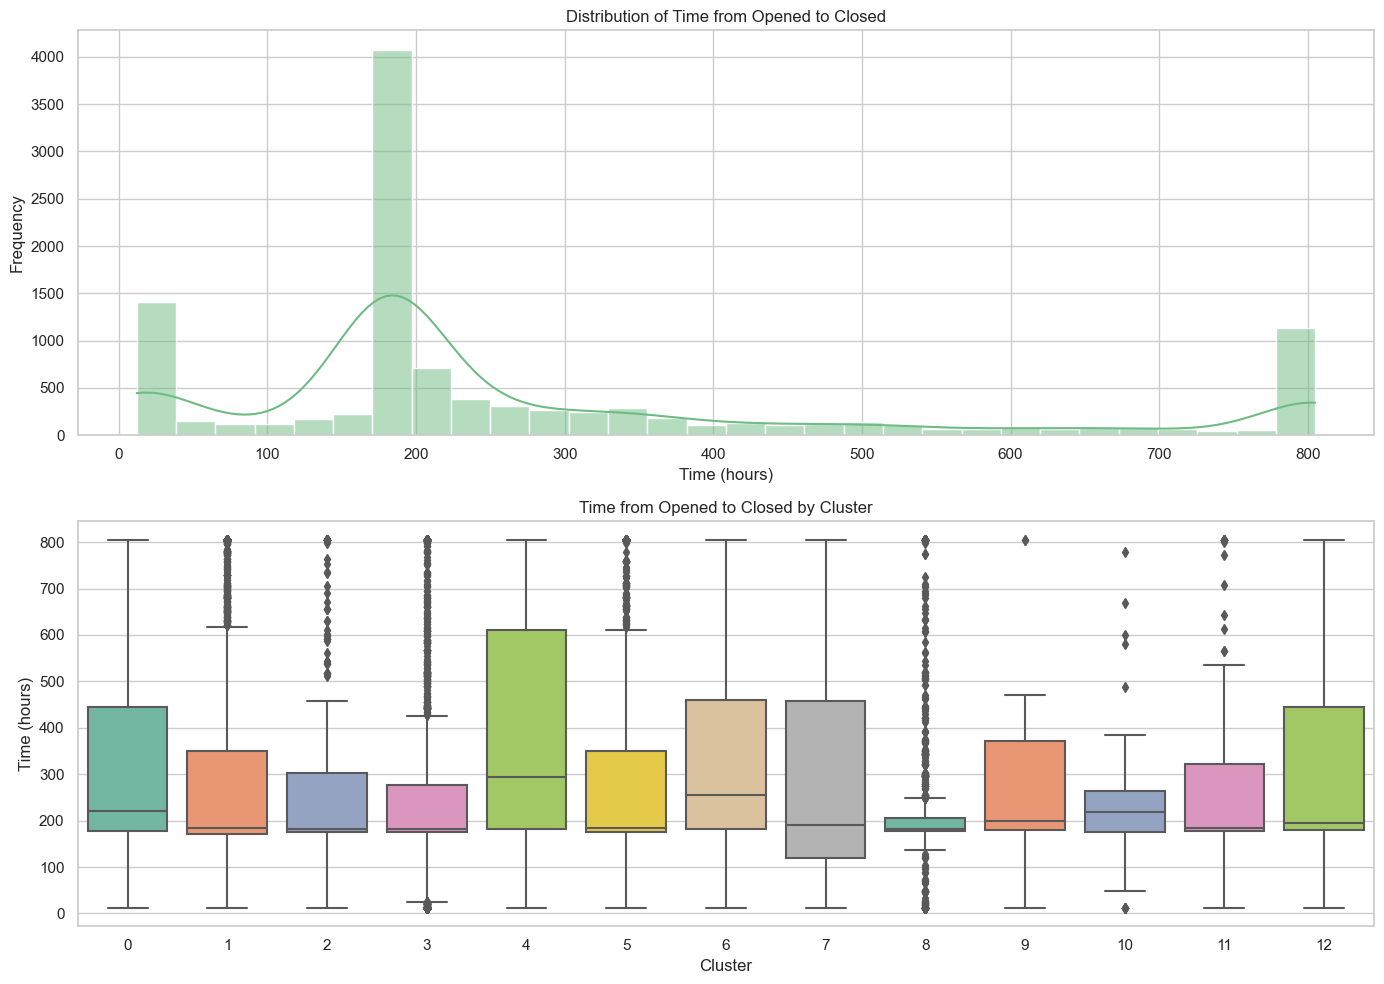

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure to hold the subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

# Histogram of 'openedToClosed'
sns.histplot(data['openedToClosed'], bins=30, ax=axes[0], color=color_main, kde=True)
axes[0].set_title('Distribution of Time from Opened to Closed')
axes[0].set_xlabel('Time (hours)')
axes[0].set_ylabel('Frequency')


# Boxplot of 'openedToClosed' by 'cluster'
sns.boxplot(x='cluster', y='openedToClosed', data=data, ax=axes[1], palette="Set2")
axes[1].set_title('Time from Opened to Closed by Cluster')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Time (hours)')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()




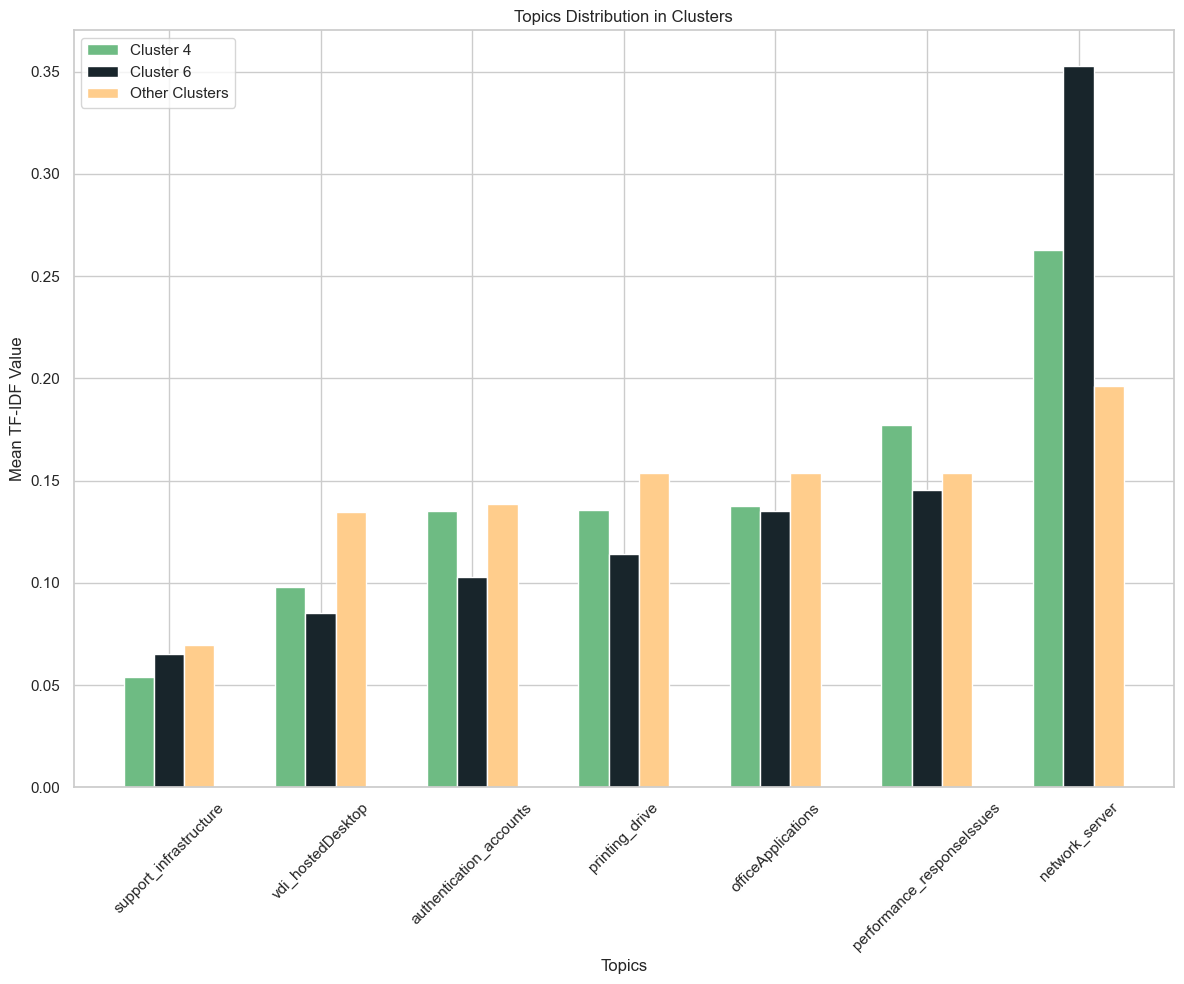

<Figure size 640x480 with 0 Axes>

(topic_network_server                0.262628
 topic_performance_responseIssues    0.177018
 topic_vdi_hostedDesktop             0.098180
 topic_authentication_accounts       0.135272
 topic_officeApplications            0.137402
 topic_printing_drive                0.135453
 topic_support_infrastructure        0.054048
 dtype: float64,
 topic_network_server                0.145416
 topic_performance_responseIssues    0.114114
 topic_vdi_hostedDesktop             0.065133
 topic_authentication_accounts       0.135173
 topic_officeApplications            0.085067
 topic_printing_drive                0.102602
 topic_support_infrastructure        0.352494
 dtype: float64,
 topic_network_server                0.153715
 topic_performance_responseIssues    0.153539
 topic_vdi_hostedDesktop             0.196424
 topic_authentication_accounts       0.138458
 topic_officeApplications            0.153683
 topic_printing_drive                0.134437
 topic_support_infrastructure        0.069744


In [133]:
# Filter data for Cluster 4 and 6 and others for comparison
cluster_4_data = data[data['cluster'] == 4]
cluster_6_data = data[data['cluster'] == 6]
other_clusters_data = data[data['cluster'].isin([0, 1, 2, 3, 5])]

# Summarize issue topics within Cluster 7
cluster_4_issues_summary = cluster_4_data[topic_columns].mean()
cluster_6_issues_summary = cluster_6_data[topic_columns].mean()
other_clusters_issues_summary = other_clusters_data[topic_columns].mean()

# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Set bar width
bar_width = 0.2

# Set positions for bars
positions_4 = range(len(cluster_4_issues_summary))
positions_6 = [p + bar_width for p in positions_4]
positions_other = [p + bar_width * 2 for p in positions_4]

# Plotting bars
ax.bar(positions_4, cluster_4_issues_summary.sort_values(), color=color_main, width=bar_width, label='Cluster 4')
ax.bar(positions_6, cluster_6_issues_summary.sort_values(), color=color_second, width=bar_width, label='Cluster 6')
ax.bar(positions_other, other_clusters_issues_summary.sort_values(), color=color_CS, width=bar_width, label='Other Clusters')

# Set x-axis ticks and labels
ax.set_xticks([p + bar_width for p in positions_4])
ax.set_xticklabels([col.replace('topic_', '') for col in cluster_4_issues_summary.sort_values().index], rotation=45)
# Titles and labels
plt.title('Topics Distribution in Clusters')
plt.xlabel('Topics')
plt.ylabel('Mean TF-IDF Value')
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

# Adjust layout and show the plots
plt.tight_layout(pad=3.0)
plt.show()

(cluster_4_issues_summary, cluster_6_issues_summary, other_clusters_issues_summary)


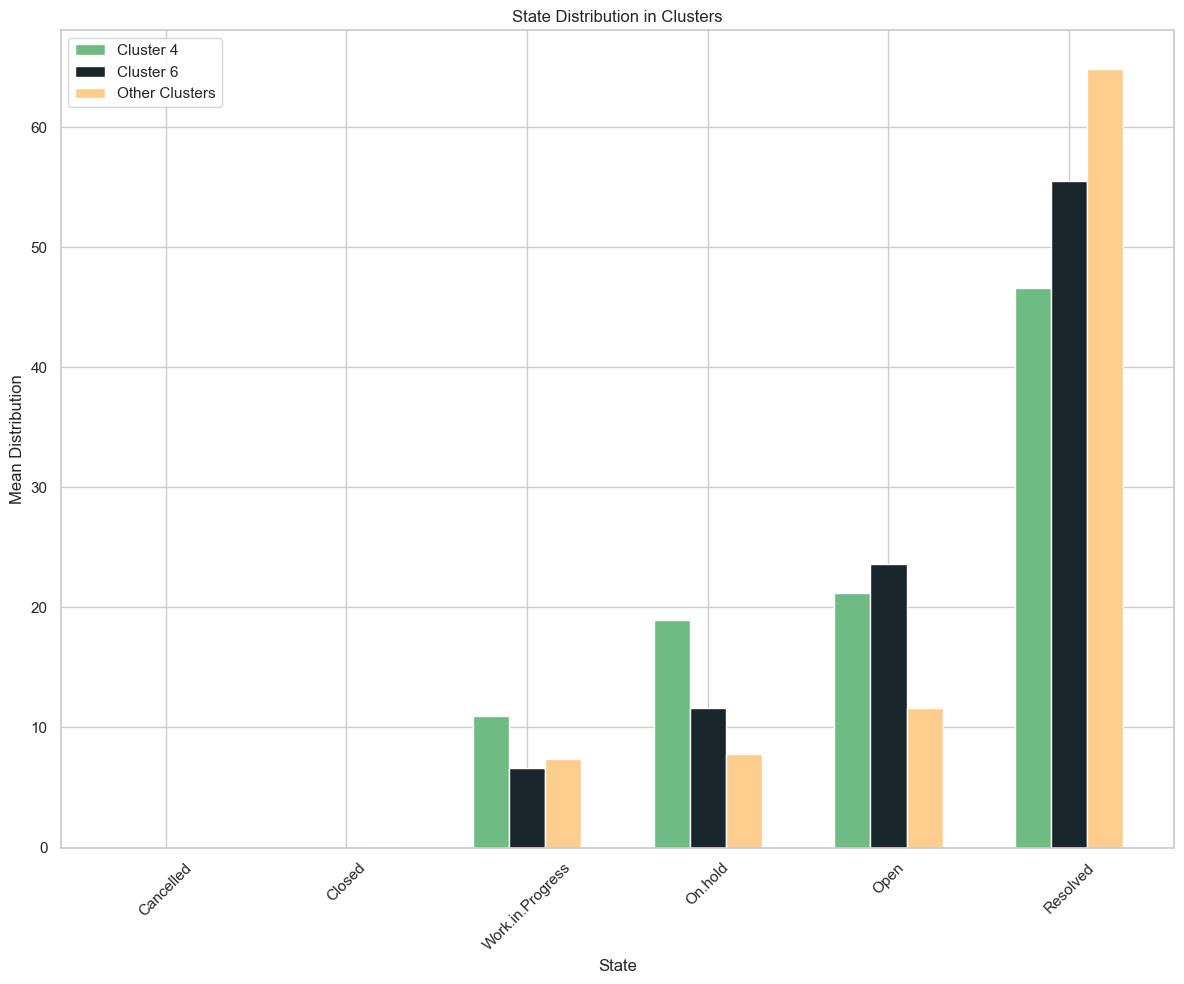

<Figure size 640x480 with 0 Axes>

(prop_state_Cancelled            0.000000
 prop_state_Closed               0.000000
 prop_state_On.hold             18.920969
 prop_state_Open                21.192611
 prop_state_Resolved            46.613662
 prop_state_Work.in.Progress    10.941379
 dtype: float64,
 prop_state_Cancelled            0.000000
 prop_state_Closed               0.000000
 prop_state_On.hold             23.629626
 prop_state_Open                11.578681
 prop_state_Resolved            55.483538
 prop_state_Work.in.Progress     6.664681
 dtype: float64,
 prop_state_Cancelled            0.162251
 prop_state_Closed               0.000010
 prop_state_On.hold             11.606408
 prop_state_Open                 7.370077
 prop_state_Resolved            64.813888
 prop_state_Work.in.Progress     7.808989
 dtype: float64)

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter data for Cluster 4 and 6 and others for comparison
cluster_4 = data[data['cluster'].isin([4])]
cluster_6 = data[data['cluster'].isin([6])]
others = data[~data['cluster'].isin([4, 6])]

# Filtering columns
columns_state = [col for col in data.columns if col.startswith('prop_state')]

# Calculating means
cluster_4_state_summary = cluster_4[columns_state].mean()
cluster_6_state_summary = cluster_6[columns_state].mean()
others_state_summary = others[columns_state].mean()

# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Set bar width
bar_width = 0.2

# Set positions for bars
positions_4 = range(len(cluster_4_state_summary))
positions_6 = [p + bar_width for p in positions_4]
positions_other = [p + bar_width * 2 for p in positions_4]

# Plotting bars
ax.bar(positions_4, cluster_4_state_summary.sort_values(), color=color_main, width=bar_width, label='Cluster 4')
ax.bar(positions_6, cluster_6_state_summary.sort_values(), color=color_second, width=bar_width, label='Cluster 6')
ax.bar(positions_other, others_state_summary.sort_values(), color=color_CS, width=bar_width, label='Other Clusters')

# Set x-axis ticks and labels
ax.set_xticks([p + bar_width for p in positions_4])
ax.set_xticklabels([col.replace('prop_state_', '') for col in cluster_4_state_summary.sort_values().index], rotation=45)
# Titles and labels
plt.title('State Distribution in Clusters')
plt.xlabel('State')
plt.ylabel('Mean Distribution')
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

# Adjust layout and show the plots
plt.tight_layout(pad=3.0)
plt.show()

(cluster_4_state_summary, cluster_6_state_summary, others_state_summary)




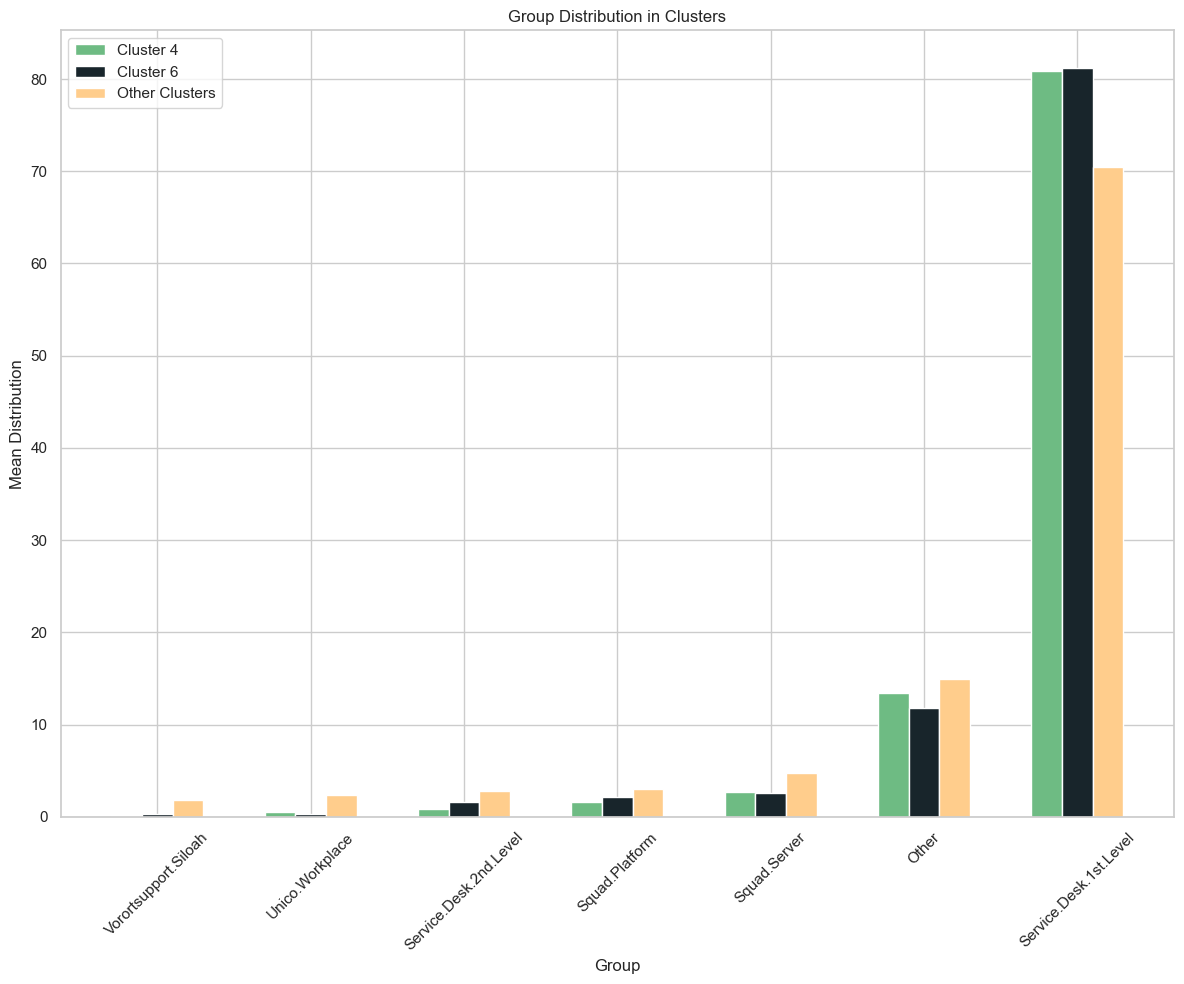

<Figure size 640x480 with 0 Axes>

(prop_group_Other                     13.437011
 prop_group_Service.Desk.1st.Level    80.848489
 prop_group_Service.Desk.2nd.Level     0.849951
 prop_group_Squad.Platform             1.616601
 prop_group_Squad.Server               2.686108
 prop_group_Unico.Workplace            0.521215
 prop_group_Vorortsupport.Siloah       0.040706
 dtype: float64,
 prop_group_Other                     11.766242
 prop_group_Service.Desk.1st.Level    81.212571
 prop_group_Service.Desk.2nd.Level     0.331560
 prop_group_Squad.Platform             1.647209
 prop_group_Squad.Server               2.148330
 prop_group_Unico.Workplace            0.336901
 prop_group_Vorortsupport.Siloah       2.557297
 dtype: float64,
 prop_group_Other                     14.962835
 prop_group_Service.Desk.1st.Level    70.413333
 prop_group_Service.Desk.2nd.Level     1.775310
 prop_group_Squad.Platform             4.709091
 prop_group_Squad.Server               2.765627
 prop_group_Unico.Workplace            3.015648
 prop_

In [122]:
# Filtering columns
columns_group = [col for col in data.columns if col.startswith('prop_group')]

# Calculating means
cluster_4_group_summary = cluster_4[columns_group].mean()
cluster_6_group_summary = cluster_6[columns_group].mean()
others_group_summary = others[columns_group].mean()

# Set figure size
fig, ax = plt.subplots(figsize=(12, 10))

# Set bar width
bar_width = 0.2

# Set positions for bars
positions_4 = range(len(cluster_4_group_summary))
positions_6 = [p + bar_width for p in positions_4]
positions_other = [p + bar_width * 2 for p in positions_4]

# Plotting bars
ax.bar(positions_4, cluster_4_group_summary.sort_values(), color=color_main, width=bar_width, label='Cluster 4')
ax.bar(positions_6, cluster_6_group_summary.sort_values(), color=color_second, width=bar_width, label='Cluster 6')
ax.bar(positions_other, others_group_summary.sort_values(), color=color_CS, width=bar_width, label='Other Clusters')

# Set x-axis ticks and labels
ax.set_xticks([p + bar_width for p in positions_4])
ax.set_xticklabels([col.replace('prop_group_', '') for col in cluster_4_group_summary.sort_values().index], rotation=45)
# Titles and labels
plt.title('Group Distribution in Clusters')
plt.xlabel('Group')
plt.ylabel('Mean Distribution')
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

# Adjust layout and show the plots
plt.tight_layout(pad=3.0)
plt.show()

(cluster_4_group_summary, cluster_6_group_summary, others_group_summary)

## Look at the Distribution where the Trouble was not an 1st Level Problem

c:\Users\Student\miniforge-pypy3\envs\Thesis\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


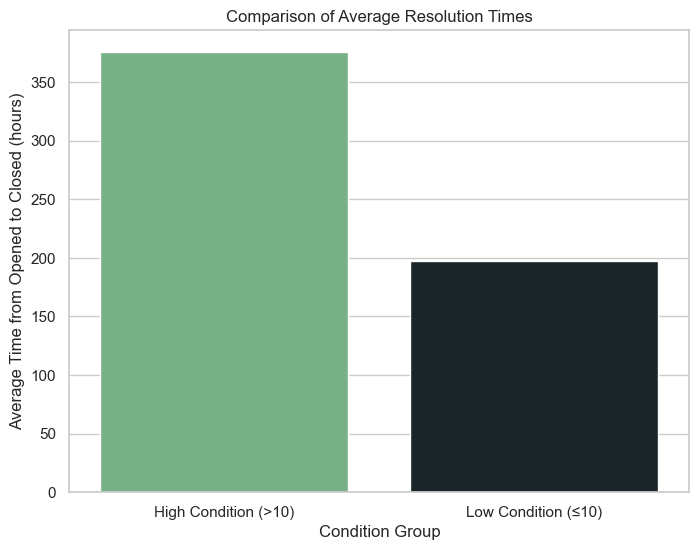

(375.4196144562192, 196.98522578287117)

In [123]:
from scipy.stats import ttest_ind

# Creating subsets based on the conditions provided
condition = ((data['prop_group_Service.Desk.1st.Level'] != 100) &
             (data['prop_group_Other'] > 20) |
             (data['prop_state_On.hold'] > 10) | 
             (data['prop_state_Open'] > 10))

subset_high = data[condition]
subset_low = data[~condition]

# Statistical test to compare 'openedToClosed' times between high and low condition subsets
t_stat, p_value = ttest_ind(subset_high['openedToClosed'], subset_low['openedToClosed'], equal_var=False)

# Mean comparison
mean_high = subset_high['openedToClosed'].mean()
mean_low = subset_low['openedToClosed'].mean()

t_stat, p_value, mean_high, mean_low

# Plot to show the comparison of average resolution times between high and low condition groups
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x=['High Condition (>10)', 'Low Condition (≤10)'], y=[mean_high, mean_low], palette=[color_main, color_second])
ax.set_title('Comparison of Average Resolution Times')
ax.set_ylabel('Average Time from Opened to Closed (hours)')
ax.set_xlabel('Condition Group')
plt.show()

mean_high, mean_low

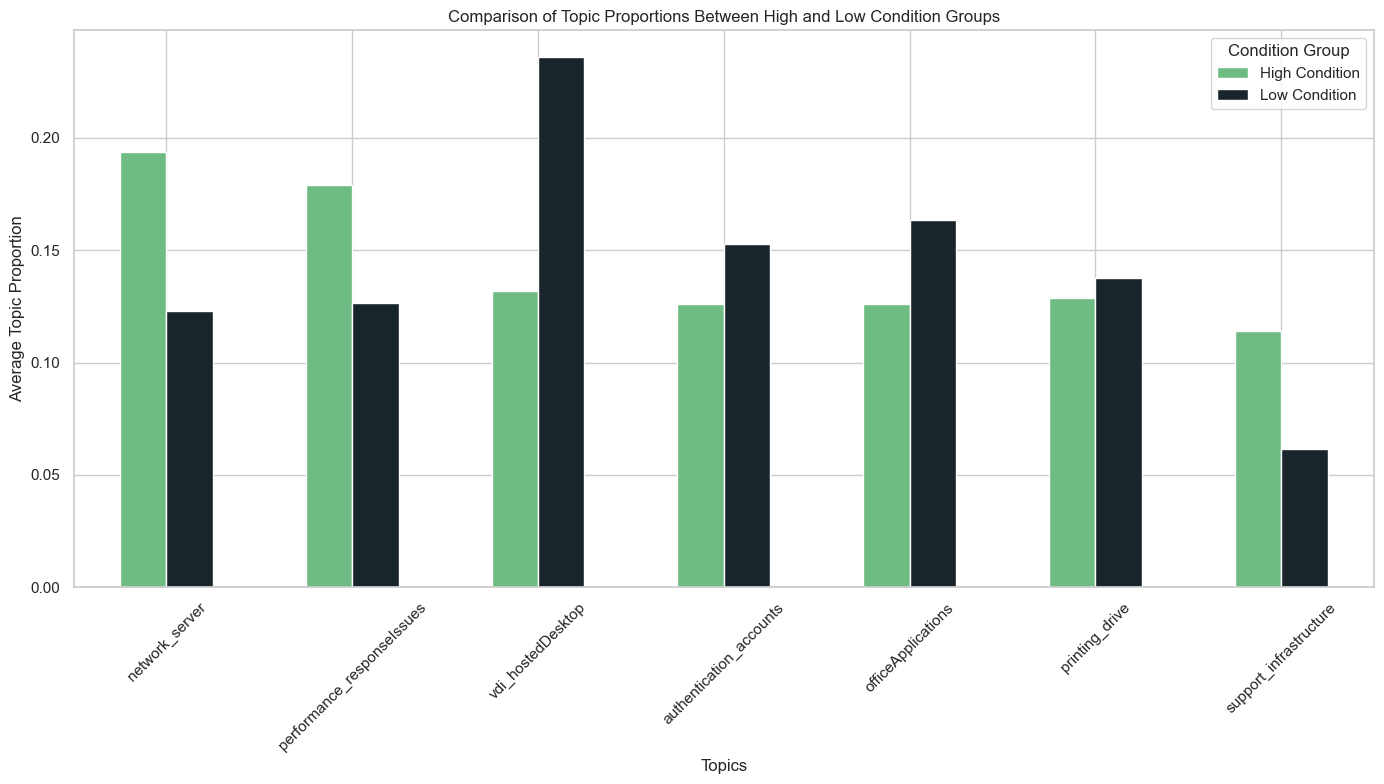

,High Condition,Low Condition
topic_network_server,0.193856,0.122741
topic_performance_responseIssues,0.178849,0.126280
topic_vdi_hostedDesktop,0.132022,0.235956
topic_authentication_accounts,0.126135,0.152575
topic_officeApplications,0.126250,0.163275
topic_printing_drive,0.128770,0.137806
topic_support_infrastructure,0.114117,0.061367


In [126]:
# Grouped analysis - calculate mean topic proportions for high condition and low condition groups
topic_means_high = subset_high[topic_columns].mean()
topic_means_low = subset_low[topic_columns].mean()

# Create a DataFrame for comparison
topic_comparison = pd.DataFrame({'High Condition': topic_means_high, 'Low Condition': topic_means_low})

# Plotting the topic proportions
fig, ax = plt.subplots(figsize=(14, 8))
topic_comparison.plot(kind='bar', ax=ax, color=[color_main, color_second])
ax.set_title('Comparison of Topic Proportions Between High and Low Condition Groups')
ax.set_ylabel('Average Topic Proportion')
ax.set_xlabel('Topics')
ax.set_xticklabels([col.replace('topic_', '') for col in topic_comparison.index], rotation=45)
plt.xticks(rotation=45)
plt.legend(title='Condition Group')
plt.tight_layout()
plt.show()

topic_comparison

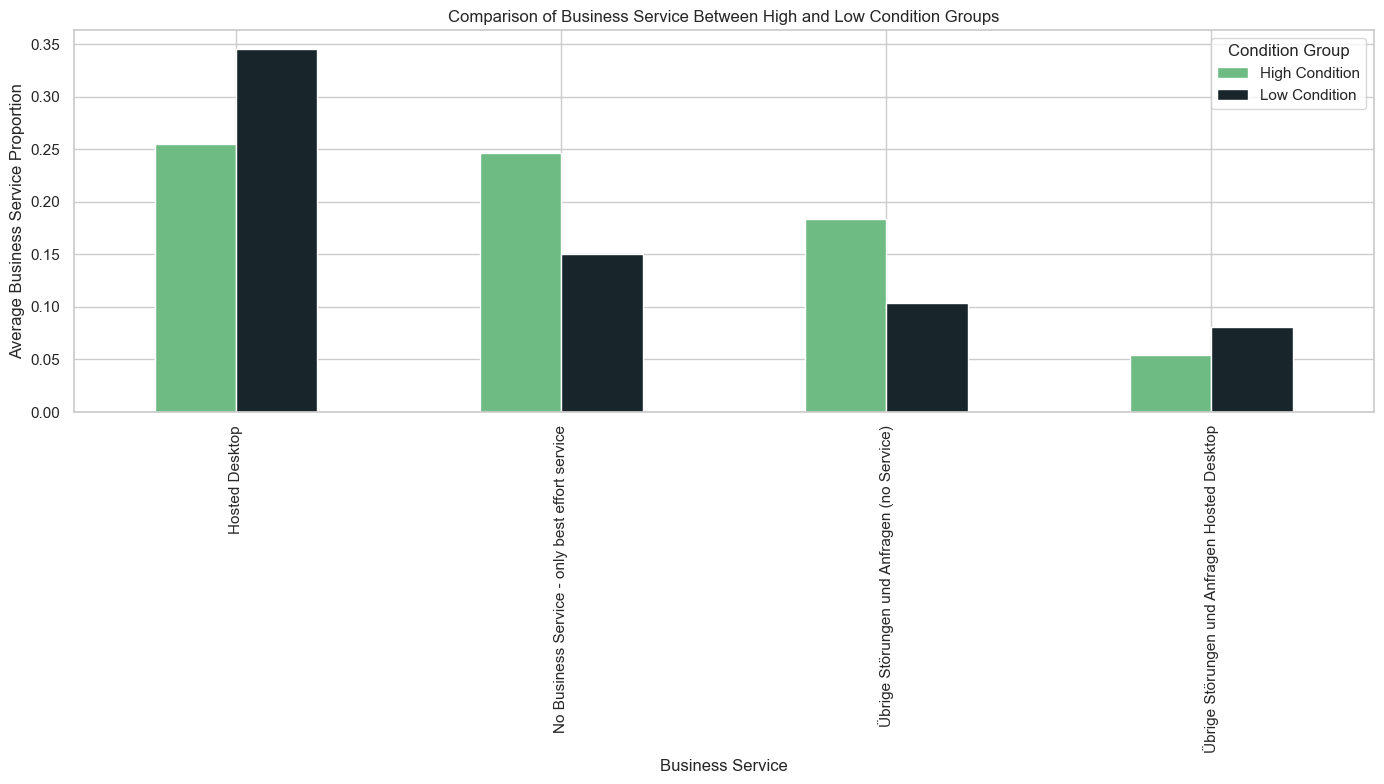

,High Condition,Low Condition
business_service,,
Hosted Desktop,0.255491,0.345840
No Business Service - only best effort service,0.246435,0.150594
Übrige Störungen und Anfragen (no Service),0.183815,0.104075
Übrige Störungen und Anfragen Hosted Desktop,0.054528,0.080475


In [153]:
# Grouped analysis - calculate mean topic proportions for high condition and low condition groups
bs_means_high = subset_high['business_service'].value_counts(normalize=True)
bs_means_low = subset_low['business_service'].value_counts(normalize=True)

# Take only top 3 of each group
bs_means_high = bs_means_high[:4]
bs_means_low = bs_means_low[:4]

# Create a DataFrame for comparison
bs_comparison = pd.DataFrame({'High Condition': bs_means_high, 'Low Condition': bs_means_low})

# Plotting the topic proportions
fig, ax = plt.subplots(figsize=(14, 8))
bs_comparison.plot(kind='bar', ax=ax, color=[color_main, color_second])
ax.set_title('Comparison of Business Service Between High and Low Condition Groups')
ax.set_ylabel('Average Business Service Proportion')
ax.set_xlabel('Business Service')
plt.xticks(rotation=90)
plt.legend(title='Condition Group')
plt.tight_layout()
plt.show()

bs_comparison


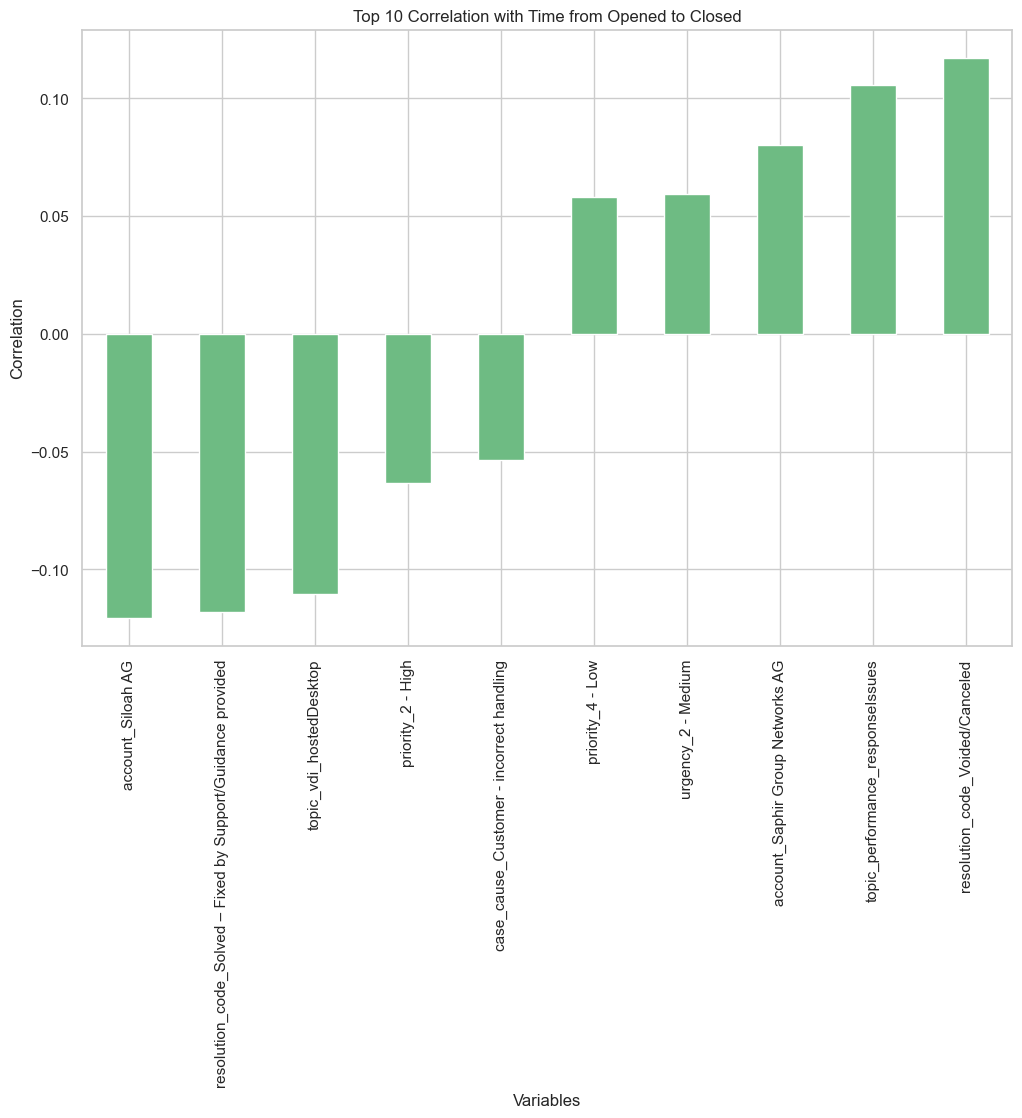

In [125]:
import numpy as np
# select columns 
data_corr = subset_high[['cluster', 'created_by_group', 'account', 'openedToClosed', 'case_cause', 'resolution_code', 'impact', 'priority', 'urgency']]
# Add topic columns
data_corr = pd.concat([data_corr, subset_high[topic_columns]], axis=1)

# Encode categorical variables using one-hot encoding where it seems appropriate
categorical_vars = ['created_by_group', 'account', 'case_cause', 'resolution_code', 'impact', 'priority', 'urgency']
data_encoded = pd.get_dummies(data_corr, columns=categorical_vars, drop_first=True)

# Calculate correlation with 'openedToClosed'
correlations = data_encoded.corr()['openedToClosed'].sort_values()

# Show correlations that are most strongly positive or negative
correlations.drop('openedToClosed', inplace=True)
correlations

# Filter top 5 positive and negative correlations
top_correlations = pd.concat([correlations.head(5), correlations.tail(5)])

# Plot the correlation values
plt.figure(figsize=(12, 8))
top_correlations.plot(kind='bar', color=color_main)
plt.title('Top 10 Correlation with Time from Opened to Closed')
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.show()